In [5]:
#This notebook took 2 minutes. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection, naive_bayes, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier



In [6]:
Politics = pd.read_excel("C:/Users/Pauly/Downloads/22166475_Paul_Long_Final_Project_ML/Survey_Data.xlsx")
Politics.head()

C:\Users\pauly\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,[meta] uuid,Unnamed: 1,[dem] country_code,[dem] age,[dem] gender,[dem] education_level,[dem] degree_of_urbanisation,[dem] residency,[dem] household_size,[dem] immigration,...,"Better infrastructure (e.g. roads, sidewalks)",Other,None of these,Unnamed: 109,… speaks his / her mind,… has the right experience,… can bring needed change,… cares about people like me,… focuses on practical solutions,… is close to the people
0,aa552c00-9d49-0134-4b90-0aaafcbd6b1f,NaN,AT,23,male,I completed high school or obtained an equival...,rural,"Yes, as a citizen",3,One or both of my parents moved here before I ...,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c8c8820-a041-0134-7ae8-0aaafcbd6b1f,NaN,AT,45,male,I have completed a university or equivalent de...,city,"Yes, as a citizen",3,My family has been here for a longer time,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11cc2fc0-9f89-0134-a13e-0aaafcbd6b1f,NaN,AT,47,male,I completed high school or obtained an equival...,rural,"Yes, as a citizen",5 or more,One or both of my parents moved here before I ...,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fa3a8ed0-9d58-0134-af7b-0aaafcbd6b1f,NaN,AT,15,male,I have some high school or secondary school ed...,rural,"Yes, as a citizen",5 or more,My family has been here for a longer time,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,026e16e0-9d49-0134-47be-0aaafcbd6b1f,NaN,AT,48,female,I have some high school or secondary school ed...,rural,"Yes, as a citizen",3,My family has been here for a longer time,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Politics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11283 entries, 0 to 11282
Columns: 116 entries, [meta] uuid to … is close to the people
dtypes: bool(17), float64(10), int64(1), object(88)
memory usage: 8.7+ MB


<AxesSubplot:>

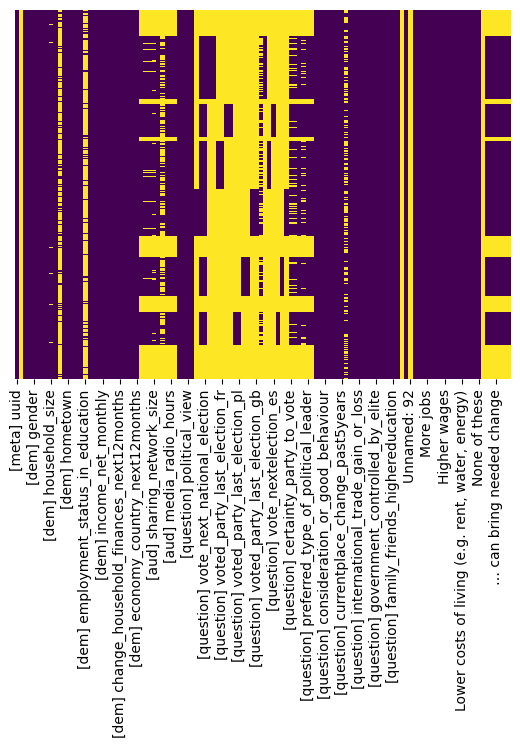

In [8]:
sns.heatmap(Politics.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
Politics = Politics.drop('[meta] uuid', axis = 1)
Politics = Politics.drop('[dem] country_code', axis = 1)
Politics = Politics.drop('[dem] residency', axis = 1)
Politics = Politics.drop('[dem] household_size', axis = 1)
Politics = Politics.drop('[dem] immigration', axis = 1)
Politics = Politics.drop('[dem] origin', axis = 1)
Politics = Politics.drop('[dem] settlement_size', axis = 1)
Politics = Politics.drop('[dem] ethnic_background', axis = 1)
Politics = Politics.drop('[dem] religion', axis = 1)
Politics = Politics.drop('[dem] employment_status_in_education', axis = 1)
Politics = Politics.drop('[dem] work_type_routine', axis = 1)
Politics = Politics.drop('[dem] work_type_manual', axis = 1)
Politics = Politics.drop('[dem] employment_status', axis = 1)
Politics = Politics.drop('[dem] disposable_income', axis = 1)
Politics = Politics.drop('[dem] household_finances_past12months', axis = 1)
Politics = Politics.drop('[dem] status_national_economy', axis = 1)
Politics = Politics.drop('[dem] change_household_finances_next12months', axis = 1)
Politics = Politics.drop('[dem] job_security', axis = 1)
Politics = Politics.drop('[dem] change_economy_country_past12months', axis = 1)
Politics = Politics.drop('[dem] economy_country_next12months', axis = 1)

In [10]:
Politics = Politics.drop('[question] vote_next_national_election', axis = 1)
Politics = Politics.drop('[question] ranking_party_de', axis = 1)
Politics = Politics.drop('[question] voted_party_last_election_de', axis = 1)
Politics = Politics.drop('[question] ranking_party_fr', axis = 1)
Politics = Politics.drop('[question] voted_party_last_election_fr', axis = 1)
Politics = Politics.drop('[question] ranking_party_es', axis = 1)
Politics = Politics.drop('[question] voted_party_last_election_es', axis = 1)
Politics = Politics.drop('[question] ranking_party_pl', axis = 1)
Politics = Politics.drop('[question] voted_party_last_election_pl', axis = 1)
Politics = Politics.drop('[question] ranking_party_it', axis = 1)
Politics = Politics.drop('[question] voted_party_last_election_it', axis = 1)
Politics = Politics.drop('[question] ranking_party_gb', axis = 1)
Politics = Politics.drop('[question] voted_party_last_election_gb', axis = 1)
Politics = Politics.drop('[question] when_vote_decision_was_made', axis = 1)
Politics = Politics.drop('[question] vote_nextelection_de', axis = 1)
Politics = Politics.drop('[question] vote_nextelection_fr', axis = 1)
Politics = Politics.drop('[question] vote_nextelection_es', axis = 1)
Politics = Politics.drop('[question] vote_nextelection_pl', axis = 1)
Politics = Politics.drop('[question] vote_nextelection_it', axis = 1)
Politics = Politics.drop('[question] vote_nextelection_gb', axis = 1)

In [11]:
Politics = Politics.drop('[question] democracy_own_country_satisfaction', axis = 1)
Politics = Politics.drop('[question] currentplace_change_past5years', axis = 1)
Politics = Politics.drop('[question] hometown_change_past5years', axis = 1)
Politics = Politics.drop('[question] country_direction_past5years', axis = 1)
Politics = Politics.drop('[question] international_trade_gain_or_loss', axis = 1)
Politics = Politics.drop('[question] vote_referendum', axis = 1)
Politics = Politics.drop('[question] frequency_of_voting', axis = 1)
Politics = Politics.drop('[question] certainty_party_to_vote', axis = 1)
Politics = Politics.drop('[question] friends_family_same_vote', axis = 1)
Politics = Politics.drop('[question] important_issues_when_voting', axis = 1)
Politics = Politics.drop('[question] ranking_importance_of_issues_when_voting', axis = 1)
Politics = Politics.drop('[question] preferred_type_of_political_leader', axis = 1)
Politics = Politics.drop('[question] frequent_sharing_of_politicalviews', axis = 1)
Politics = Politics.drop('[question] worldview', axis = 1)

In [12]:
Politics = Politics.drop('[aud] social_networks_regularly_used', axis = 1)
Politics = Politics.drop('[aud] social_media_activity_rank', axis = 1)
Politics = Politics.drop('[aud] online_sharing_frequency', axis = 1)
Politics = Politics.drop('[aud] sharing_network_size', axis = 1)
Politics = Politics.drop('[aud] member_organization', axis = 1)
Politics = Politics.drop('[aud] organization_activities_timeperweek', axis = 1)
Politics = Politics.drop('[aud] media_tv_hours', axis = 1)
Politics = Politics.drop('[aud] media_radio_hours', axis = 1)
Politics = Politics.drop('[aud] media_print_hours', axis = 1)

In [13]:
Politics = Politics.drop('Unnamed: 1', axis = 1)
Politics = Politics.drop('Unnamed: 90', axis = 1)
Politics = Politics.drop('Unnamed: 92', axis = 1)
Politics = Politics.drop('Unnamed: 109', axis = 1)
Politics = Politics.drop('Other', axis = 1)
Politics = Politics.drop('None of these', axis = 1)
Politics = Politics.drop('… speaks his / her mind', axis = 1)
Politics = Politics.drop('… has the right experience', axis = 1)
Politics = Politics.drop('… can bring needed change', axis = 1)
Politics = Politics.drop('… cares about people like me', axis = 1)
Politics = Politics.drop('… focuses on practical solutions', axis = 1)
Politics = Politics.drop('… is close to the people', axis = 1)

<AxesSubplot:>

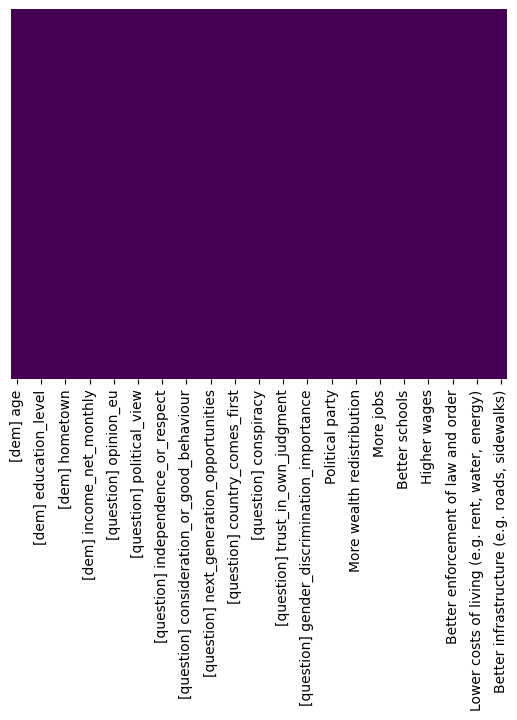

In [14]:
sns.heatmap(Politics.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
Politics['Political party'] = Politics['Political party'].astype(int)
Politics['More environmental protection'] = Politics['More environmental protection'].astype(int)
Politics['More wealth redistribution'] = Politics['More wealth redistribution'].astype(int)
Politics['Lower taxes'] = Politics['Lower taxes'].astype(int)
Politics['More jobs'] = Politics['More jobs'].astype(int)
Politics['Less immigration'] = Politics['Less immigration'].astype(int)
Politics['Better schools'] = Politics['Better schools'].astype(int)
Politics['Better healthcare'] = Politics['Better healthcare'].astype(int)
Politics['Higher wages'] = Politics['Higher wages'].astype(int)
Politics['Higher pensions'] = Politics['Higher pensions'].astype(int)
Politics['Better enforcement of law and order'] = Politics['Better enforcement of law and order'].astype(int)
Politics['Equal rights for minority groups'] = Politics['Equal rights for minority groups'].astype(int)
Politics['Lower costs of living (e.g. rent, water, energy)'] = Politics['Lower costs of living (e.g. rent, water, energy)'].astype(int)
Politics['Better public services (e.g. transportation, waste management)'] = Politics['Better public services (e.g. transportation, waste management)'].astype(int)
Politics['Better infrastructure (e.g. roads, sidewalks)'] = Politics['Better infrastructure (e.g. roads, sidewalks)'].astype(int)

In [16]:
Politics = Politics.replace("I completed high school or obtained an equivalent diploma", 4)
Politics = Politics.replace("I have completed a university or equivalent degree", 3)
Politics = Politics.replace("I have some high school or secondary school education", 2)
Politics = Politics.replace("I don’t have a formal education", 1)
Politics = Politics.replace("Other/I'd rather not answer this question", 0)

In [17]:
Politics = Politics.replace("Very secure", 2)
Politics = Politics.replace("Somewhat secure", 1)
Politics = Politics.replace("Prefer not to answer", 0)
Politics = Politics.replace("Not very secure", 1)
Politics = Politics.replace("Not at all secure", 2)

Politics = Politics.replace('male', 1)
Politics = Politics.replace("female", -1)

Politics = Politics.replace("rural", 1)
Politics = Politics.replace("city", -1)

Politics = Politics.replace("Yes", 1)
Politics = Politics.replace("Prefer not to say", 0)
Politics = Politics.replace("No", -1)

In [18]:
Politics = Politics.replace("Under 200", 100)
Politics = Politics.replace("200 -   400", 300)
Politics = Politics.replace('400 -   800', 600)
Politics = Politics.replace("800 -  1 600", 1200)
Politics = Politics.replace("1 600 -  2 400", 2000)
Politics = Politics.replace("2 400 -  3 200", 2800)
Politics = Politics.replace("3 200 -  4 800", 4000)
Politics = Politics.replace("4 800 -  6 400", 5600)
Politics = Politics.replace("6 400 -  8 000", 7200)
Politics = Politics.replace("8 000 -  9 600", 8800)
Politics = Politics.replace('9 600 - 12 000', 10800)
Politics = Politics.replace('More than 12 000', 13200)

PoliticsIncomeMean = Politics['[dem] income_net_monthly'] 
Politics['[dem] income_net_monthly'] = Politics['[dem] income_net_monthly'].replace('Prefer not to say', PoliticsIncomeMean.mean())

In [19]:
Politics = Politics.replace('Respect for elders', 1)
Politics = Politics.replace("Don't have an opinion", 0)
Politics = Politics.replace('Independence', -1)

Politics = Politics.replace('Obedience', 1)
Politics = Politics.replace('Self-reliance', -1)

Politics = Politics.replace('Good behaviour', 1)
Politics = Politics.replace('Consideration for others', -1)

Politics = Politics.replace('Good manners', 1)
Politics = Politics.replace('Curiosity', -1)

Politics = Politics.replace('Very positive', 2)
Politics = Politics.replace('Somewhat positive', 1)
Politics = Politics.replace('Neither positive nor negative', 0)
Politics = Politics.replace('Somewhat negative', -1)
Politics = Politics.replace('Very negative', -2)

In [20]:
Politics = Politics.replace('Very positively', 2)
Politics = Politics.replace('Somewhat positively', 1)
Politics = Politics.replace('Neither positively nor negatively', 0)
Politics = Politics.replace('Somewhat negatively', -1)
Politics = Politics.replace('Very negatively', -2)

Politics = Politics.replace('Very likely', 2)
Politics = Politics.replace('Fairly likely', 1)
Politics = Politics.replace("Don't know", 0)
Politics = Politics.replace('Not very likely', -1)
Politics = Politics.replace('Not at all likely', -2)

Politics = Politics.replace('Strongly agree', 2)
Politics = Politics.replace('Somewhat agree', 1)
Politics = Politics.replace('Neither agree nor disagree', 0)
Politics = Politics.replace('Somewhat disagree', -1)
Politics = Politics.replace('Strongly disagree', -2)

Politics = Politics.replace('Much better', 2)
Politics = Politics.replace('Somewhat better', 1)
Politics = Politics.replace('The same', 0)
Politics = Politics.replace('Somewhat worse', -1)
Politics = Politics.replace('Much worse', -2)

In [21]:
Politics = Politics.replace('… got much better', 2)
Politics = Politics.replace('… got somewhat better', 1)
Politics = Politics.replace('… stayed the same', 0)
Politics = Politics.replace('… got somewhat worse', -1)
Politics = Politics.replace('… got much worse', -2)

Politics = Politics.replace('Yes, very', 2)
Politics = Politics.replace('Yes, somewhat', 1)
Politics = Politics.replace('No, not really', -1)
Politics = Politics.replace('No, not at all', -2)

Politics = Politics.replace('All of them', 3)
Politics = Politics.replace('Most of them', 2)
Politics = Politics.replace('About half', 1)
Politics = Politics.replace('Less than half', -1)
Politics = Politics.replace('Only a few', -3)
Politics = Politics.replace('None', -3)

In [22]:
Politics = Politics.replace('Center left', 'Left')
Politics = Politics.replace('Center right', 'Right')
Politics = Politics.replace('Extreme left', 'Left')
Politics = Politics.replace('Extreme right', 'Right')

In [23]:
Politics = Politics.rename(columns={"[dem] age":"Age",
                                    "[dem] gender":"Gender",
                                    "[dem] education_level":"Education Level",
                                    "[dem] degree_of_urbanisation":"Urbanisation",
                                    "[dem] hometown":"Hometown",
                                    "[dem] lgbtq":"LBGTQ",
                                    "[dem] income_net_monthly":"Income Monthly",
                                    "[dem] financial_security":"Financial Security",
                                    "[question] opinion_eu":"Opinion EU",
                                    "[question] opinion_government":"Opinion Government",
                                    "[question] political_view":"Political View",
                                    "[question] likelihood_to_demonstrate":"Likelihood to Demonstrate",
                                    "[question] independence_or_respect":"Independence or Respect",
                                    "[question] obedience_or_selfreliance":"Obedience or Self Reliance",
                                    "[question] consideration_or_good_behaviour":"Consideration or Good Behaviour",
                                    "[question] curiosity_or_good_manners":"Curiosity or Good Manners",
                                    "[question] next_generation_opportunities":"Next Generation Opportunities",
                                    "[question] financial_situation_change_past5years":"Financial Situation Change",
                                    "[question] country_comes_first":"Country Comes First",
                                    "[question] improving_life_by_hardwork":"Improving Life by Hardwork",
                                    "[question] conspiracy":"Conspiracy",
                                    "[question] government_controlled_by_elite":"Government Controlled by Elite",
                                    "[question] gender_discrimination_importance":"Gender Discrimination Importance",
                                    "[question] family_friends_highereducation":"Family Friends Higher Education",
                                    "[question] trust_in_own_judgment":"Trust in Own Judgement",
                                    "[question] perceived_effect_of_diversity":"Perceived Effect of Diversity", 
                                    "Political party": "Political Party",
                                    "More environmental protection": "More Enviromental Protection",
                                    "More wealth redistribution": "More Wealth Redistribution",
                                    "Lower taxes": "Lower Taxes",
                                    "More jobs": "More Jobs",
                                    "Less immigration": "Less Immigration",
                                    "Better schools": "Better Schools",
                                    "Better healthcare": "Healthcare",
                                    "Higher wages": "Wages",
                                    "Higher pensions": "Pensions",
                                    "Better enforcement of law and order": "Better Enforcement of Law and Order",
                                    "Equal rights for minority groups": "Equal Rights for Minority Groups",
                                    "Lower costs of living (e.g. rent, water, energy)": "Lower Costs of Living",
                                    "Better public services (e.g. transportation, waste management)": "Better Public Servies",
                                    "Better infrastructure (e.g. roads, sidewalks)": "Better Infrastructure"})#, inplace = True)

In [24]:
Politics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11283 entries, 0 to 11282
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  11283 non-null  int64 
 1   Gender                               11283 non-null  int64 
 2   Education Level                      11283 non-null  int64 
 3   Urbanisation                         11283 non-null  int64 
 4   Hometown                             11283 non-null  int64 
 5   LBGTQ                                11283 non-null  int64 
 6   Income Monthly                       11283 non-null  int64 
 7   Financial Security                   11283 non-null  int64 
 8   Opinion EU                           11283 non-null  int64 
 9   Opinion Government                   11283 non-null  int64 
 10  Political View                       11283 non-null  object
 11  Likelihood to Demonstrate            1128

In [25]:
Politics = Politics.sample(frac=1, axis=0).reset_index(drop=True)
Politics['Political View'].head(20)

0      Left
1      Left
2      Left
3      Left
4     Right
5     Right
6     Right
7      Left
8     Right
9     Right
10     Left
11     Left
12    Right
13     Left
14    Right
15    Right
16    Right
17     Left
18     Left
19    Right
Name: Political View, dtype: object

<AxesSubplot:xlabel='Political View', ylabel='count'>

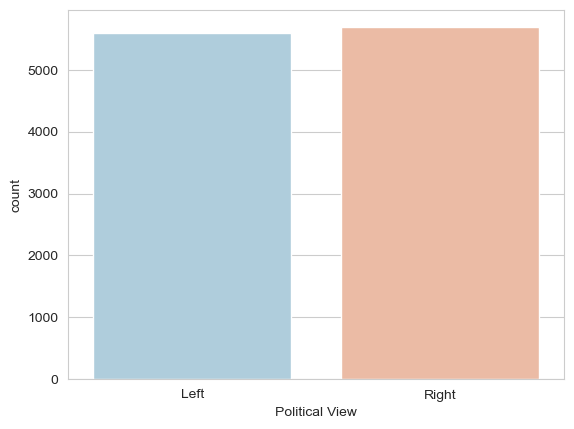

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Political View',data=Politics,palette='RdBu_r')

In [27]:
Politics = Politics.replace('Left', 0)
Politics = Politics.replace('Right', 1)
Politics = Politics.astype(float)

#Train Test Split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(Politics.drop('Political View',axis=1), 
                                                    Politics['Political View'], test_size=0.3)

In [28]:
Train_Y

1870     1.0
1950     1.0
10919    0.0
8466     1.0
6436     1.0
        ... 
7013     0.0
5961     0.0
3680     0.0
9034     0.0
5315     0.0
Name: Political View, Length: 7898, dtype: float64

In [29]:
#Logistic Regression
logmodel = LogisticRegression()

logmodel.fit(Train_X,Train_Y)
Predictions_LR = logmodel.predict(Test_X)
print("Logistic Regression Accuracy: ",accuracy_score(Test_Y,Predictions_LR))
print("Logistic Regression Classification Report: \n",classification_report(Test_Y,Predictions_LR))

Logistic Regression Accuracy:  0.6446085672082718
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

         0.0       0.66      0.61      0.63      1695
         1.0       0.63      0.68      0.66      1690

    accuracy                           0.64      3385
   macro avg       0.65      0.64      0.64      3385
weighted avg       0.65      0.64      0.64      3385



C:\Users\pauly\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
#K Nearest neighbours
knn = KNeighborsClassifier(n_neighbors = 3)
KNN = knn.fit(Train_X,Train_Y)
Predictions_KNN = KNN.predict(Test_X)
print("K Nearest Neighbours Accuracy :",accuracy_score(Predictions_KNN, Test_Y))
print("K Nearest Neighbours Classification Report:\n",classification_report(Predictions_KNN, Test_Y))

C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K Nearest Neighbours Accuracy : 0.5474150664697194
K Nearest Neighbours Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.55      0.54      1611
         1.0       0.57      0.54      0.56      1774

    accuracy                           0.55      3385
   macro avg       0.55      0.55      0.55      3385
weighted avg       0.55      0.55      0.55      3385



In [31]:
Error_Rate_KNN = []
for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    KNN_CV = knn.fit(Train_X,Train_Y)
    pred_i = knn.predict(Test_X)
    Error_Rate_KNN.append(np.mean(pred_i != Test_Y))

C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

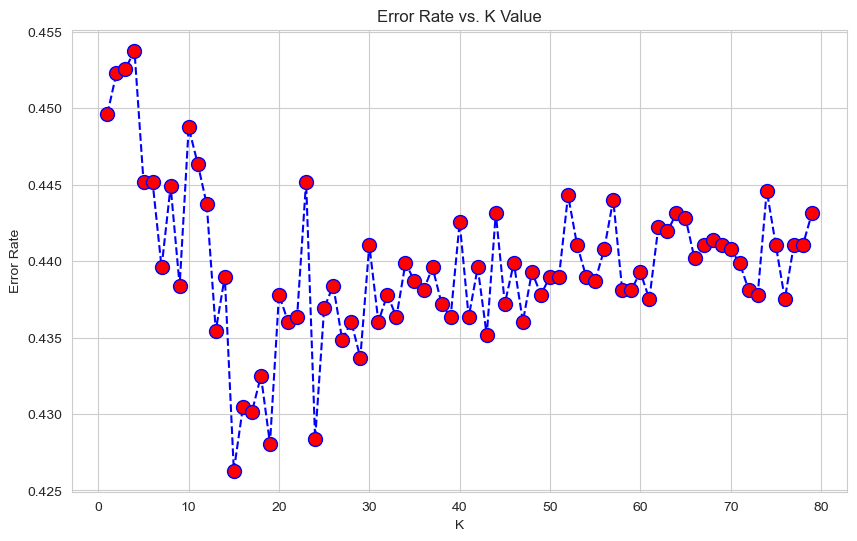

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,80),Error_Rate_KNN,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
knn = KNeighborsClassifier(n_neighbors = 25)
KNN = knn.fit(Train_X,Train_Y)
Predictions_KNN = KNN.predict(Test_X)
print("K Nearest Neighbours Accuracy :",accuracy_score(Predictions_KNN, Test_Y))
print("K Nearest Neighbours Classification Report:\n",classification_report(Predictions_KNN, Test_Y))

C:\Users\pauly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K Nearest Neighbours Accuracy : 0.5630723781388478
K Nearest Neighbours Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.57      0.55      1558
         1.0       0.60      0.56      0.58      1827

    accuracy                           0.56      3385
   macro avg       0.56      0.56      0.56      3385
weighted avg       0.57      0.56      0.56      3385



In [34]:
#Decision Tree - CART
dtcart = DecisionTreeClassifier(criterion="gini")
DT_CART = dtcart.fit(Train_X, Train_Y)
Predictions_DT_CART = DT_CART.predict(Test_X)
print("Decision Tree Accuracy :",accuracy_score(Predictions_DT_CART, Test_Y))
print("Decision Tree Classification Report:\n",classification_report(Predictions_DT_CART, Test_Y))


Decision Tree Accuracy : 0.5580502215657311
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.56      0.56      1671
         1.0       0.56      0.56      0.56      1714

    accuracy                           0.56      3385
   macro avg       0.56      0.56      0.56      3385
weighted avg       0.56      0.56      0.56      3385



In [35]:
#Decision Tree - C5.0
dtc5 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
DT_C5 = dtc5.fit(Train_X, Train_Y)
Predictions_DT_C5 = DT_C5.predict(Test_X)
print("Decision Tree Accuracy :",accuracy_score(Predictions_DT_C5, Test_Y))
print("Decision Tree Classification Report:\n",classification_report(Predictions_DT_C5, Test_Y))


Decision Tree Accuracy : 0.6053175775480059
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.61      0.59      1571
         1.0       0.64      0.60      0.62      1814

    accuracy                           0.61      3385
   macro avg       0.61      0.61      0.60      3385
weighted avg       0.61      0.61      0.61      3385



In [36]:
Error_Rate_DT_C5i = []
for i in range(1,20):
    dtc5i = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    DT_C5i = dtc5i.fit(Train_X,Train_Y)
    pred_i = DT_C5i.predict(Test_X)
    Error_Rate_DT_C5i.append(np.mean(pred_i != Test_Y))

Text(0, 0.5, 'Error Rate')

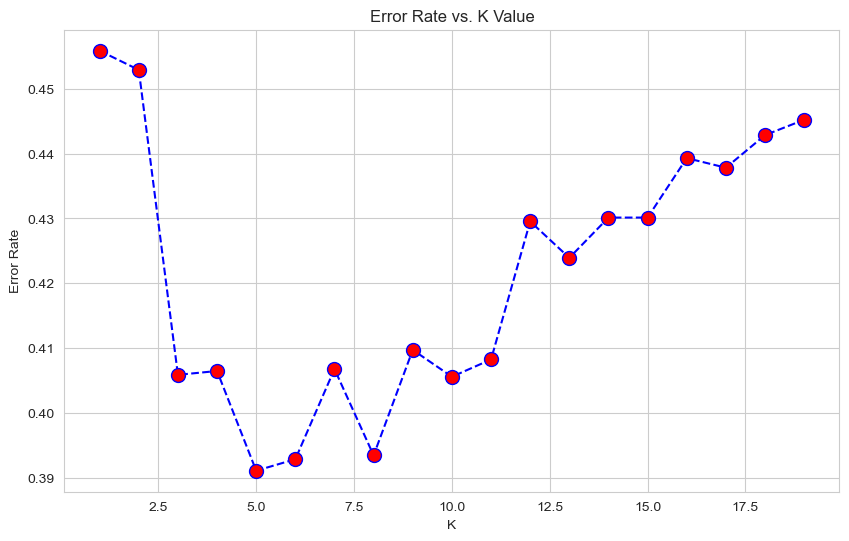

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),Error_Rate_DT_C5i,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
dtc5 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
DT_C5 = dtc5.fit(Train_X, Train_Y)
Predictions_DT_C5 = DT_C5.predict(Test_X)
print("Decision Tree Accuracy :",accuracy_score(Predictions_DT_C5, Test_Y))
print("Decision Tree Classification Report:\n",classification_report(Predictions_DT_C5, Test_Y))

Decision Tree Accuracy : 0.6088626292466766
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.60      0.63      1923
         1.0       0.54      0.63      0.58      1462

    accuracy                           0.61      3385
   macro avg       0.61      0.61      0.61      3385
weighted avg       0.62      0.61      0.61      3385



In [39]:
#AdaBoost CLassifier
ab = AdaBoostClassifier(n_estimators=10)
AB = ab.fit(Train_X,Train_Y)
Predictions_AB = AB.predict(Test_X)
print("AdaBoost Accuracy:", accuracy_score(Predictions_AB, Test_Y))
print("\nAdaBoost Classification:\n", classification_report(Predictions_AB, Test_Y))

AdaBoost Accuracy: 0.6333825701624816

AdaBoost Classification:
               precision    recall  f1-score   support

         0.0       0.57      0.65      0.61      1492
         1.0       0.69      0.62      0.65      1893

    accuracy                           0.63      3385
   macro avg       0.63      0.64      0.63      3385
weighted avg       0.64      0.63      0.63      3385



In [40]:
Error_Rate_AB = []
for i in range(1,50):
    abi = AdaBoostClassifier(n_estimators=i)
    ABi = abi.fit(Train_X,Train_Y)
    pred_i = ABi.predict(Test_X)
    Error_Rate_AB.append(np.mean(pred_i != Test_Y))

Text(0, 0.5, 'Error Rate')

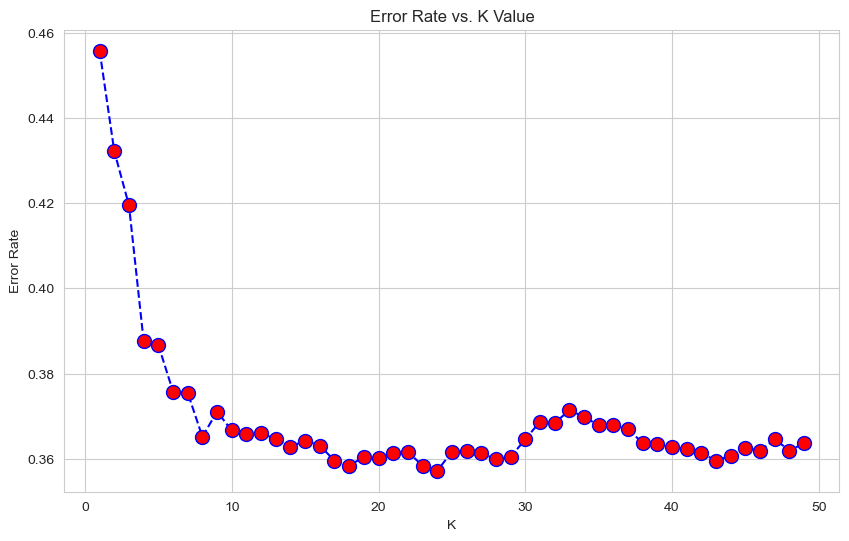

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),Error_Rate_AB,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
ab = AdaBoostClassifier(n_estimators=20)
AB = ab.fit(Train_X,Train_Y)
Predictions_AB = AB.predict(Test_X)
print("AdaBoost Accuracy:", accuracy_score(Predictions_AB, Test_Y))
print("\nAdaBoost Classification:\n", classification_report(Predictions_AB, Test_Y))

AdaBoost Accuracy: 0.6398818316100443

AdaBoost Classification:
               precision    recall  f1-score   support

         0.0       0.61      0.65      0.63      1588
         1.0       0.67      0.63      0.65      1797

    accuracy                           0.64      3385
   macro avg       0.64      0.64      0.64      3385
weighted avg       0.64      0.64      0.64      3385



In [43]:
#Gradient Boost
XGB = GradientBoostingClassifier(n_estimators=100)
XGB = XGB.fit(Train_X,Train_Y)
Predictions_XGB = XGB.predict(Test_X)
print("XGB Accuracy:",accuracy_score(Predictions_XGB, Test_Y))
print("\nXGB Classification:\n", classification_report(Predictions_XGB, Test_Y))

XGB Accuracy: 0.638109305760709

XGB Classification:
               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62      1540
         1.0       0.68      0.63      0.65      1845

    accuracy                           0.64      3385
   macro avg       0.64      0.64      0.64      3385
weighted avg       0.64      0.64      0.64      3385



In [44]:
# Random Forest
RF = RandomForestClassifier(n_estimators = 100)
RF = RF.fit(Train_X,Train_Y)
Predictions_RF = RF.predict(Test_X)
print("Random Forest Accuracy:", accuracy_score(Predictions_RF, Test_Y))
print("RandomForest Classification:\n", classification_report(Predictions_RF, Test_Y))

Random Forest Accuracy: 0.6277695716395865
RandomForest Classification:
               precision    recall  f1-score   support

         0.0       0.59      0.64      0.61      1573
         1.0       0.66      0.62      0.64      1812

    accuracy                           0.63      3385
   macro avg       0.63      0.63      0.63      3385
weighted avg       0.63      0.63      0.63      3385



In [45]:
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
LDA = lda.fit(Train_X,Train_Y)
Predictions_LDA = LDA.predict(Test_X)
print("Linear Discriminant Analaysis Accuracy :",accuracy_score(Predictions_LDA, Test_Y))
print("Linear Discriminant Analaysis Classification Report :\n",classification_report(Predictions_LDA, Test_Y))

Linear Discriminant Analaysis Accuracy : 0.6443131462333825
Linear Discriminant Analaysis Classification Report :
               precision    recall  f1-score   support

         0.0       0.60      0.66      0.63      1553
         1.0       0.69      0.63      0.66      1832

    accuracy                           0.64      3385
   macro avg       0.64      0.65      0.64      3385
weighted avg       0.65      0.64      0.64      3385



In [49]:
#Neural Network
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 3), 
                  learning_rate = 'adaptive',
                  learning_rate_init = 0.01, 
                  max_iter=1000000)
NN = nn.fit(Train_X,Train_Y)
Predictions_NN = NN.predict(Test_X)

print("Neural Network Accuracy :",accuracy_score(Predictions_NN, Test_Y))
print("Neural Network Classification Report :\n",classification_report(Predictions_NN, Test_Y))


Neural Network Accuracy : 0.6277695716395865
Neural Network Classification Report :
               precision    recall  f1-score   support

         0.0       0.61      0.63      0.62      1647
         1.0       0.64      0.62      0.63      1738

    accuracy                           0.63      3385
   macro avg       0.63      0.63      0.63      3385
weighted avg       0.63      0.63      0.63      3385

